In [2]:
library(ggplot2)
library(MASS)
library(Matrix)
library(lme4)
library(arm)

The folder pyth contains outcome y and inputs x1, x2 for 40 data points, with a further 20 points with the inputs but no observed outcome. Save the file to your working directory and read it into R using the read.table() function.

In [3]:
www <- "http://www.stat.columbia.edu/%7Egelman/arm/examples/pyth/exercise2.1.dat"
mydata <- read.table(www, header = TRUE)
mydata.train <- mydata[0:40, ]
mydata.test <- mydata[-1:-40,]

In [4]:
# Alternate way of taking the first 40 rows
library(dplyr)
mydata %>% head(40)


Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,y,x1,x2
1,15.68,6.87,14.09
2,6.18,4.40,4.35
3,18.10,0.43,18.09
4,9.07,2.73,8.65
5,17.97,3.25,17.68
6,10.04,5.30,8.53
7,20.74,7.08,19.50
8,9.76,9.73,0.72
9,8.23,4.51,6.88
10,6.52,6.40,1.26


In [5]:
# Alternate way of taking the last 20 rows
mydata %>% tail(20)

,y,x1,x2
41,NA,9.87,10.43
42,NA,9.99,15.72
43,NA,8.39,0.35
44,NA,0.80,10.91
45,NA,9.58,15.82
46,NA,4.82,11.90
47,NA,2.97,2.46
48,NA,8.80,4.09
49,NA,6.07,1.80
50,NA,0.19,13.54


*(a) Use R to fit a linear regression model predicting y from x1,x2, using the first 40 data points in the file. Summarize the inferences and check the fit of your model.*

In [6]:
fit.1 <- lm (y ~ x1 + x2, mydata.train)

In [7]:
display(fit.1)

lm(formula = y ~ x1 + x2, data = mydata.train)
            coef.est coef.se
(Intercept) 1.32     0.39   
x1          0.51     0.05   
x2          0.81     0.02   
---
n = 40, k = 3
residual sd = 0.90, R-Squared = 0.97


The residual standard deviation is small (0.90) and the fraction of variance explained is large (R-squared=0.97). These indicate a good fit for the training data.

*(b) Display the estimated model graphically as in Figure 3.2.*

In [8]:
fit.1.sim <- sim(fit.1)
coef(fit.1.sim)[0:2,]

(Intercept),x1,x2
1.1475196,0.5551646,0.7944872
1.4957974,0.4774996,0.8013661


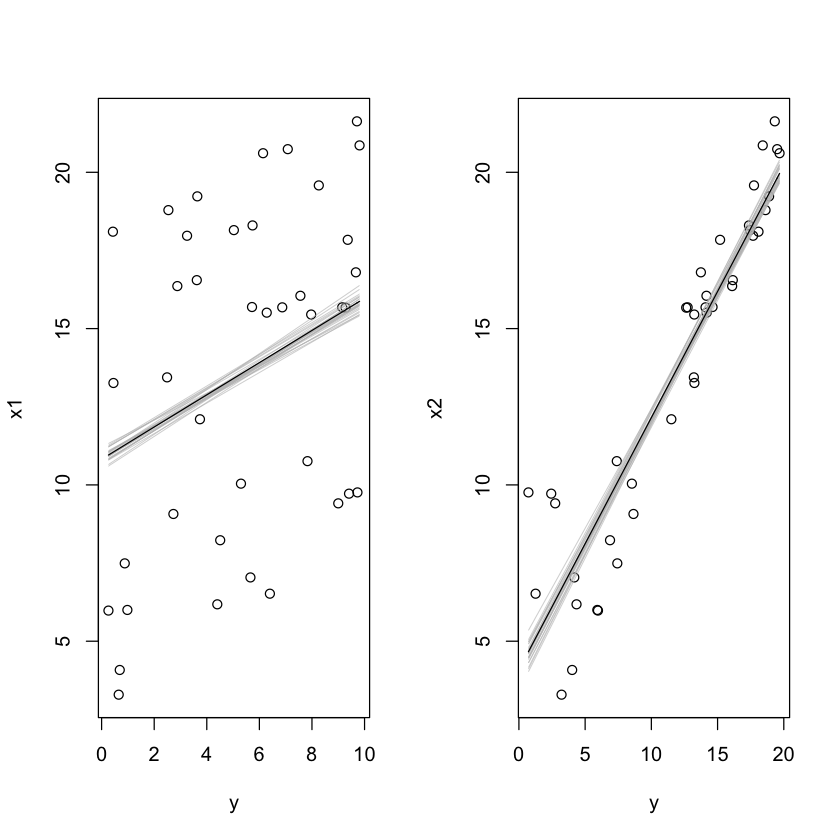

In [9]:
par (mfrow=c(1,2))

# Plot of fit against x1 with x2 held to it's average value
plot(mydata.train$x1, mydata.train$y, xlab="y", ylab="x1")
for (i in 1:25){
    curve(cbind (1, x, mean(mydata.train$x2)) %*% coef(fit.1.sim)[i,], lwd=.5, col="gray", add=TRUE)
}
curve (cbind (1, x, mean(mydata.train$x2)) %*% coef(fit.1), col="black", add=TRUE)

# Plot of fit against x2 with x1 held to it's average value
plot(mydata.train$x2, mydata.train$y, xlab="y", ylab="x2")
for (i in 1:25){
    curve(cbind (1, mean(mydata.train$x1), x) %*% coef(fit.1.sim)[i,], lwd=.5, col="gray", add=TRUE)
}
curve (cbind (1, mean(mydata.train$x1), x) %*% coef(fit.1), col="black", add=TRUE)

*(c) Make a residual plot for this model. Do the assumptions appear to be met?*

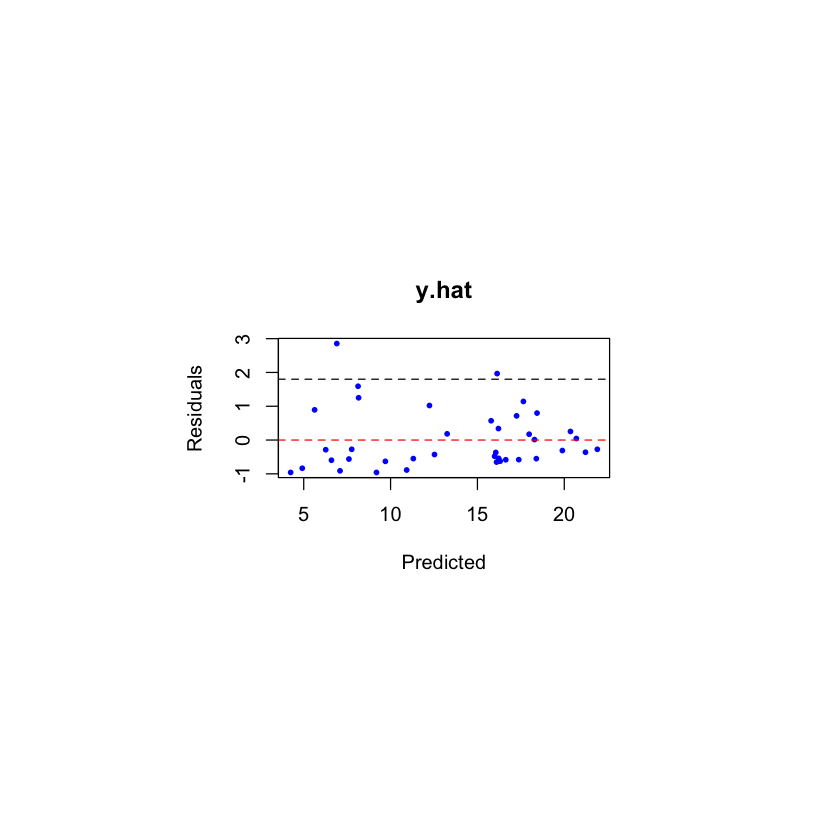

In [11]:
#http://www.inches-to-cm.com
#10.16 cm = 4 in; 7.62 cm = 3 in
nf <- layout(matrix(1), widths = lcm(10.16), heights = lcm(7.62))
#layout.show(nf)

y.hat <- fitted(fit.1)
u <- resid(fit.1)
sigma <- sigma.hat(fit.1)
residual.plot(y.hat, u, sigma, lwd=1)

The residual plot appears odd with a lot of mass in the lower end.

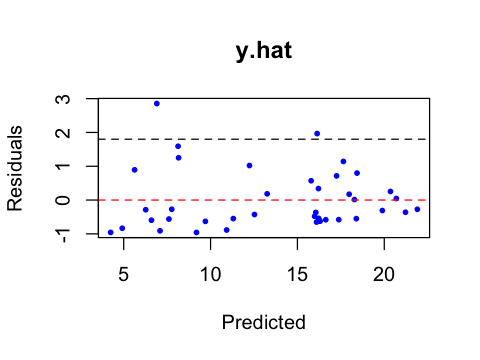

In [12]:
# Alternate way to be able to size the plots, so the output is more compact.
#http://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html
library(repr)
# in inches
options(repr.plot.width=4, repr.plot.height=3)

y.hat <- fitted(fit.1)
u <- resid(fit.1)
sigma <- sigma.hat(fit.1)
residual.plot(y.hat, u, sigma, lwd=1)

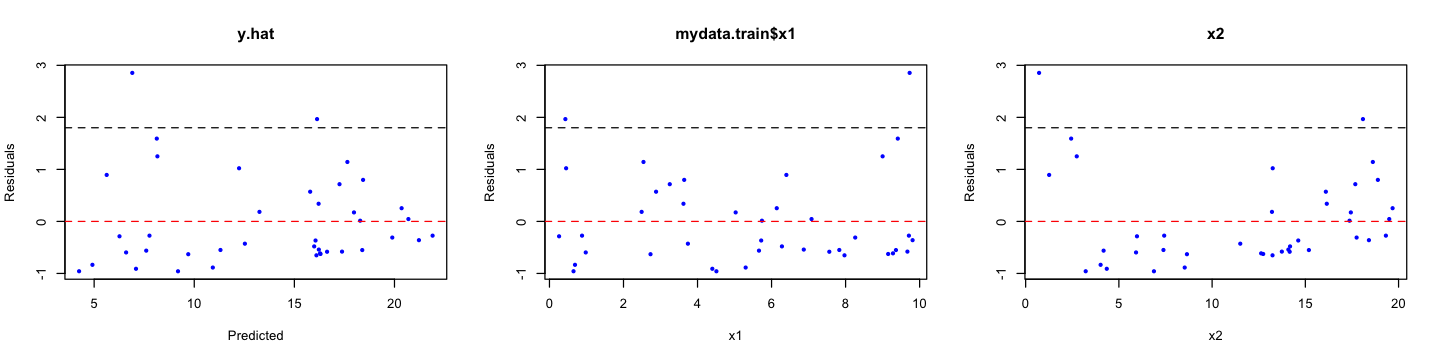

In [13]:
options(repr.plot.width=12, repr.plot.height=3)
par(mfrow=c(1,3))

y.hat <- fitted(fit.1)
u <- resid(fit.1)
sigma <- sigma.hat(fit.1)
residual.plot(y.hat, u, sigma, lwd=1)

residual.plot(mydata.train$x1, u, sigma, xlab='x1', lwd=1)

residual.plot(mydata.train$x2, u, sigma, main='x2', xlab='x2', lwd=1)

*(d) Make predictions for the remaining 20 data points in the file. How confident
do you feel about these predictions?*

In [14]:
predict (fit.1, mydata.test, interval="prediction", level=0.95)

,fit,lwr,upr
41,14.81248,12.91697,16.70800
42,19.14287,17.24152,21.04421
43,5.916816,3.958626,7.875005
44,10.530475,8.636141,12.424809
45,19.01249,17.11860,20.90637
46,13.39886,11.55182,15.24591
47,4.829144,2.918323,6.739965
48,9.145767,7.228364,11.063170
49,5.892489,3.979060,7.805918
50,12.33864,10.42635,14.25093


The residual plot may indicate issues (specifically the linearity assumption) so not quite sure of the goodness of the predictions.